In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, classification_report, confusion_matrix, recall_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [45]:
df = pd.read_csv("worldCup_dataset.csv" , sep = "," , encoding = 'utf-8')

In [46]:
df.head(10)

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,target
0,1311,1930-07-13,Belgium,United States,0.0,3.0,FIFA World Cup,Montevideo,Uruguay,True,2
1,1312,1930-07-13,France,Mexico,4.0,1.0,FIFA World Cup,Montevideo,Uruguay,True,1
2,1313,1930-07-14,Brazil,Yugoslavia,1.0,2.0,FIFA World Cup,Montevideo,Uruguay,True,2
3,1314,1930-07-14,Peru,Romania,1.0,3.0,FIFA World Cup,Montevideo,Uruguay,True,2
4,1315,1930-07-15,Argentina,France,1.0,0.0,FIFA World Cup,Montevideo,Uruguay,True,1
5,1316,1930-07-16,Chile,Mexico,3.0,0.0,FIFA World Cup,Montevideo,Uruguay,True,1
6,1317,1930-07-17,Bolivia,Yugoslavia,0.0,4.0,FIFA World Cup,Montevideo,Uruguay,True,2
7,1318,1930-07-17,Paraguay,United States,0.0,3.0,FIFA World Cup,Montevideo,Uruguay,True,2
8,1320,1930-07-18,Uruguay,Peru,1.0,0.0,FIFA World Cup,Montevideo,Uruguay,False,1
9,1321,1930-07-19,Argentina,Mexico,6.0,3.0,FIFA World Cup,Montevideo,Uruguay,True,1


In [47]:
df.tail(10)

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,target
890,40287,2018-07-03,Sweden,Switzerland,1.0,0.0,FIFA World Cup,Saint Petersburg,Russia,True,1
891,40288,2018-07-03,Colombia,England,1.0,1.0,FIFA World Cup,Moscow,Russia,True,0
892,40290,2018-07-06,Uruguay,France,0.0,2.0,FIFA World Cup,Nizhny Novgorod,Russia,True,2
893,40291,2018-07-06,Brazil,Belgium,1.0,2.0,FIFA World Cup,Kazan,Russia,True,2
894,40292,2018-07-07,Sweden,England,0.0,2.0,FIFA World Cup,Samara,Russia,True,2
895,40293,2018-07-07,Russia,Croatia,2.0,2.0,FIFA World Cup,Sochi,Russia,False,0
896,40294,2018-07-10,France,Belgium,1.0,0.0,FIFA World Cup,Saint Petersburg,Russia,True,1
897,40295,2018-07-11,Croatia,England,2.0,1.0,FIFA World Cup,Moscow,Russia,True,1
898,40296,2018-07-14,Belgium,England,2.0,0.0,FIFA World Cup,Saint Petersburg,Russia,True,1
899,40297,2018-07-15,France,Croatia,4.0,2.0,FIFA World Cup,Moscow,Russia,True,1


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  900 non-null    int64  
 1   date        900 non-null    object 
 2   home_team   900 non-null    object 
 3   away_team   900 non-null    object 
 4   home_score  900 non-null    float64
 5   away_score  900 non-null    float64
 6   tournament  900 non-null    object 
 7   city        900 non-null    object 
 8   country     900 non-null    object 
 9   neutral     900 non-null    bool   
 10  target      900 non-null    int64  
dtypes: bool(1), float64(2), int64(2), object(6)
memory usage: 71.3+ KB


In [49]:
df.isnull().sum()

Unnamed: 0    0
date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
target        0
dtype: int64

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 [Text(0.5, 0, 'Unnamed: 0'),
  Text(1.5, 0, 'date'),
  Text(2.5, 0, 'home_team'),
  Text(3.5, 0, 'away_team'),
  Text(4.5, 0, 'home_score'),
  Text(5.5, 0, 'away_score'),
  Text(6.5, 0, 'tournament'),
  Text(7.5, 0, 'city'),
  Text(8.5, 0, 'country'),
  Text(9.5, 0, 'neutral'),
  Text(10.5, 0, 'target')])

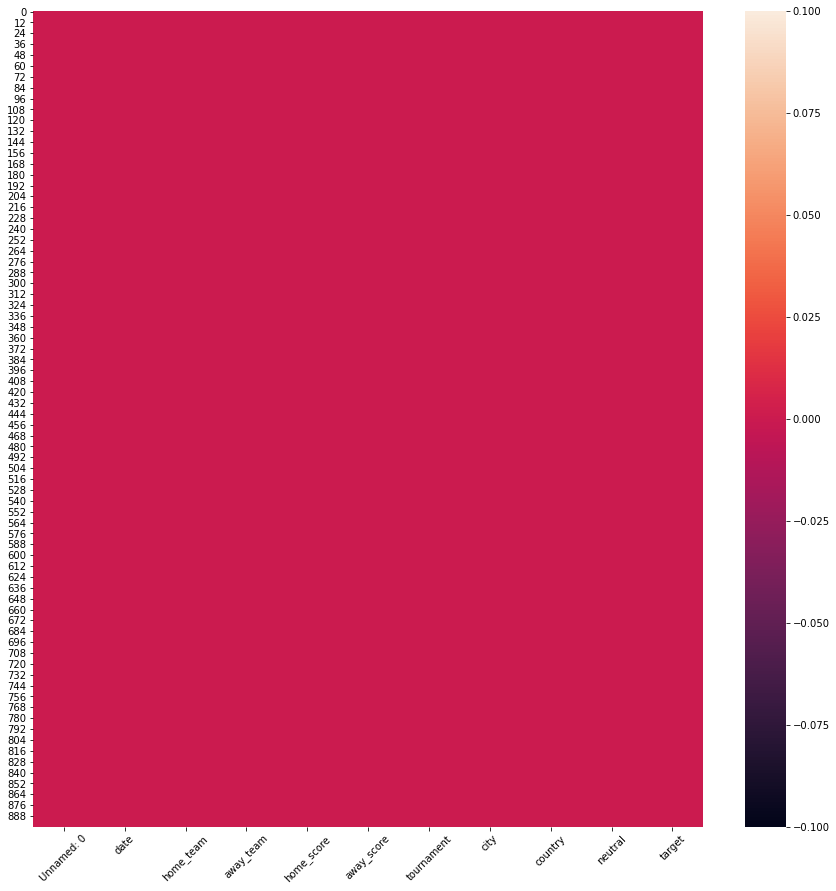

In [50]:
plt.figure(figsize=(15,15))
sns.heatmap(df.isnull())
plt.xticks(rotation=45)

In [51]:
df.nunique()

Unnamed: 0    900
date          355
home_team      78
away_team      79
home_score     11
away_score      9
tournament      1
city          161
country        17
neutral         2
target          3
dtype: int64

In [52]:
df['neutral'].unique()

array([ True, False])

In [53]:
df['date'] = df["date"].str.split("-", n = 0, expand = True)

In [54]:
df['date'] = df['date'].astype(int)

In [55]:
df["neutral"] = df["neutral"].astype(int)

In [56]:
df

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,target
0,1311,1930,Belgium,United States,0.0,3.0,FIFA World Cup,Montevideo,Uruguay,1,2
1,1312,1930,France,Mexico,4.0,1.0,FIFA World Cup,Montevideo,Uruguay,1,1
2,1313,1930,Brazil,Yugoslavia,1.0,2.0,FIFA World Cup,Montevideo,Uruguay,1,2
3,1314,1930,Peru,Romania,1.0,3.0,FIFA World Cup,Montevideo,Uruguay,1,2
4,1315,1930,Argentina,France,1.0,0.0,FIFA World Cup,Montevideo,Uruguay,1,1
...,...,...,...,...,...,...,...,...,...,...,...
895,40293,2018,Russia,Croatia,2.0,2.0,FIFA World Cup,Sochi,Russia,0,0
896,40294,2018,France,Belgium,1.0,0.0,FIFA World Cup,Saint Petersburg,Russia,1,1
897,40295,2018,Croatia,England,2.0,1.0,FIFA World Cup,Moscow,Russia,1,1
898,40296,2018,Belgium,England,2.0,0.0,FIFA World Cup,Saint Petersburg,Russia,1,1


<AxesSubplot:>

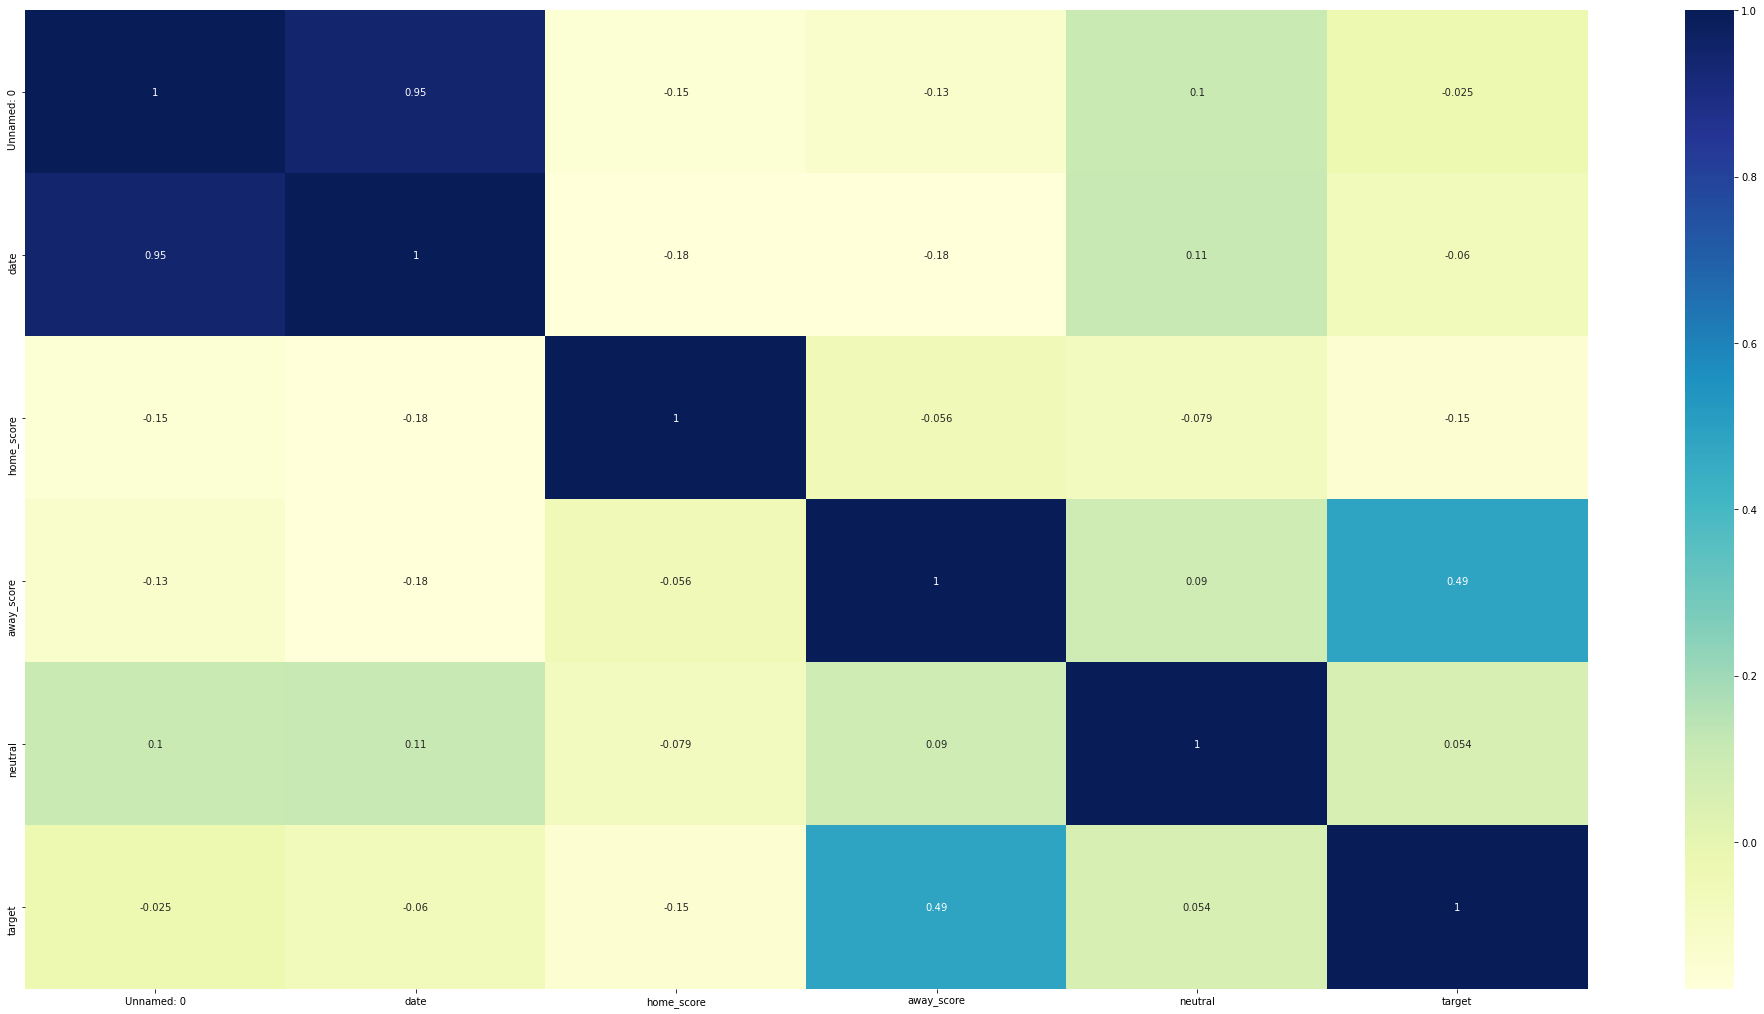

In [57]:
plt.figure(figsize = (35,18))
sns.heatmap(df.corr() , annot = True , cmap = "YlGnBu")

In [58]:
home_team_encoder = preprocessing.LabelEncoder()
df['home_team'] = home_team_encoder.fit_transform(df['home_team'])


away_team_encoder = preprocessing.LabelEncoder()
df['away_team'] = away_team_encoder.fit_transform(df['away_team'])


city_encoder = preprocessing.LabelEncoder()
df['city'] = city_encoder.fit_transform(df['city'])


country_encoder = preprocessing.LabelEncoder()
df['country'] = country_encoder.fit_transform(df['country'])



In [59]:
df.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,target
0,1311,1930,5,75,0.0,3.0,FIFA World Cup,83,16,1,2
1,1312,1930,26,42,4.0,1.0,FIFA World Cup,83,16,1,1
2,1313,1930,8,78,1.0,2.0,FIFA World Cup,83,16,1,2
3,1314,1930,52,56,1.0,3.0,FIFA World Cup,83,16,1,2
4,1315,1930,2,25,1.0,0.0,FIFA World Cup,83,16,1,1


In [60]:
df.drop('Unnamed: 0', inplace=True, axis=1)
df.drop('tournament', inplace=True, axis=1)

In [61]:
df_clean = df.copy()
df_clean.to_csv('fifa world cup clean.csv', encoding='utf-8',  index=False)



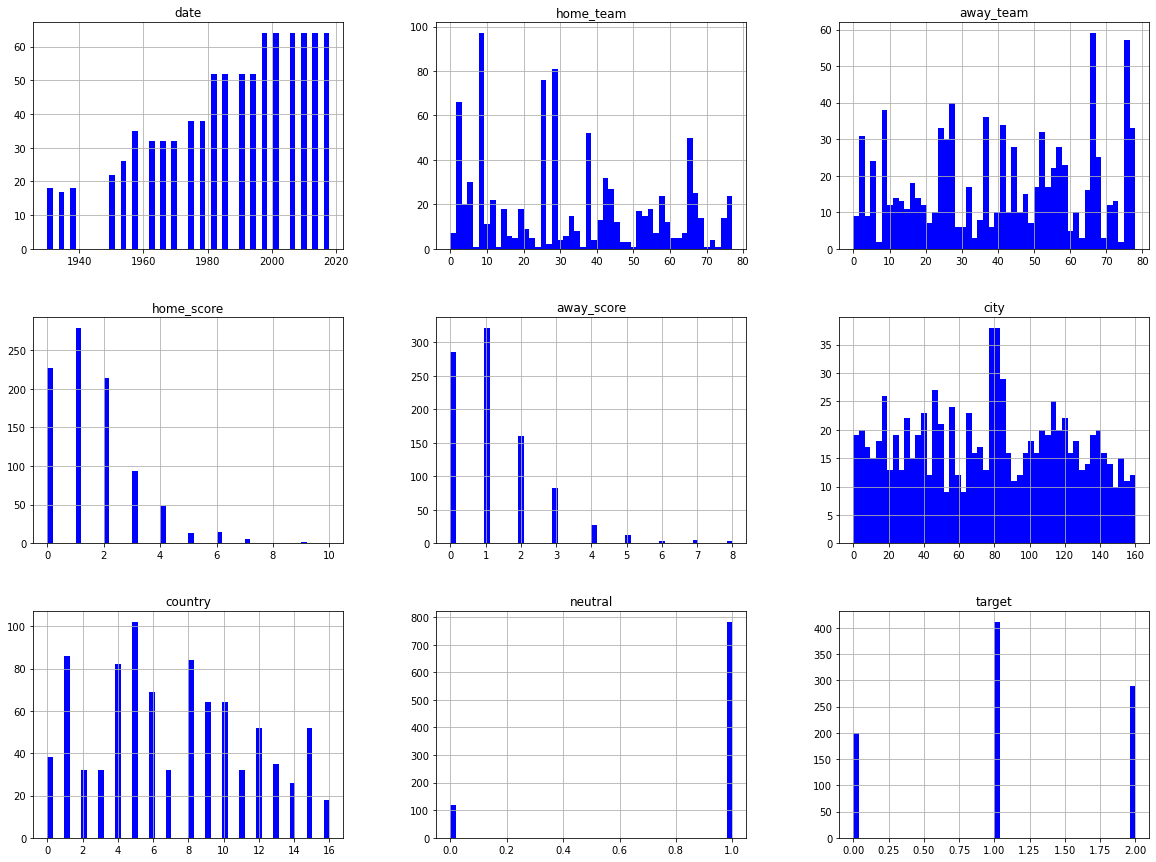

In [62]:
df.hist(bins=50, figsize=(20,15), color='b')
plt.show()

In [63]:
x = df.drop(['target'],axis=1).values
y = df['target'].values

In [64]:
sd_scaler = StandardScaler()
x = sd_scaler.fit_transform(x)

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3, shuffle=True, random_state=0)

In [66]:
print ("x train shape",x_train.shape)
print ("y train shape",y_train.shape)
print ("x test shape",x_test.shape)
print ("y test shape",x_test.shape)

x train shape (630, 8)
y train shape (630,)
x test shape (270, 8)
y test shape (270, 8)


In [67]:
rf = RandomForestClassifier(criterion='entropy',n_estimators=20)
rf.fit(x_train, y_train)
rf.score(x_train,y_train)

1.0

In [68]:
y_pred = rf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))

Accuracy 0.9740740740740741


In [69]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.92      0.94        62
           1       0.98      0.98      0.98       131
           2       0.97      1.00      0.99        77

    accuracy                           0.97       270
   macro avg       0.97      0.97      0.97       270
weighted avg       0.97      0.97      0.97       270



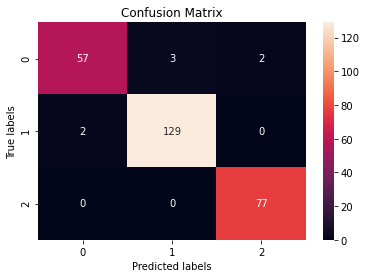

In [70]:
rf = confusion_matrix(y_test,y_pred)
ax= plt.subplot()
sns.heatmap(rf, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [109]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_depth=4)
dt_clf.fit(x_train, y_train)
dt_clf.score(x_train,y_train)


0.9952380952380953

In [110]:
y_pred = dt_clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))

Accuracy 0.9814814814814815


In [111]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        62
           1       1.00      0.99      1.00       131
           2       0.94      1.00      0.97        77

    accuracy                           0.98       270
   macro avg       0.98      0.98      0.98       270
weighted avg       0.98      0.98      0.98       270



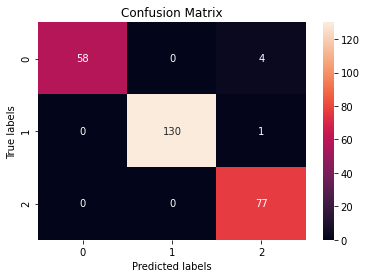

In [112]:
cm = confusion_matrix(y_test,y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [96]:
knn = KNeighborsClassifier(n_neighbors=15)

In [97]:
knn.fit(x_train,y_train)
knn.score(x_train,y_train)

0.807936507936508

In [98]:
knn_pred = knn.predict(x_test)
print("Accuracy",accuracy_score(y_test,knn_pred))

Accuracy 0.7962962962962963


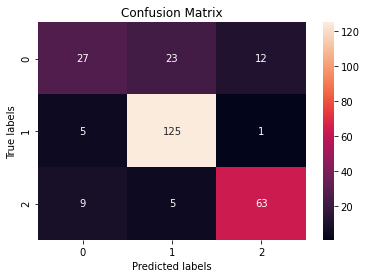

In [99]:
cm = confusion_matrix(y_test,knn_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 


In [100]:
print(classification_report(y_test,knn_pred))

              precision    recall  f1-score   support

           0       0.66      0.44      0.52        62
           1       0.82      0.95      0.88       131
           2       0.83      0.82      0.82        77

    accuracy                           0.80       270
   macro avg       0.77      0.74      0.74       270
weighted avg       0.78      0.80      0.78       270



In [81]:
from sklearn.linear_model import LogisticRegression

In [82]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

1.0

In [83]:
lr_pred = lr.predict(x_test)
print("Accuracy",accuracy_score(y_test,lr_pred))

Accuracy 1.0


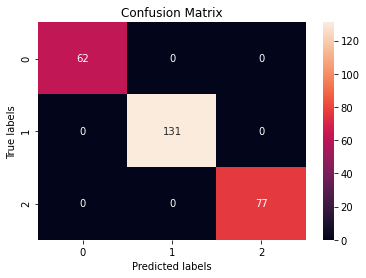

In [84]:
cm = confusion_matrix(y_test,lr_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
